In [4]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", 150)

import os
import sys


current = os.path.dirname(os.path.realpath("bust_visualization"))
parent = os.path.dirname(current)

prospects = pd.read_csv(parent + "/player_data/prospects.csv")

In [5]:
prospects = prospects.loc[:,["ncaa_player_name", "ncaa_team", "rookie_Age", "ncaa_conf", 
                             "ncaa_usg", "ncaa_efg%", 
                             "ncaa_ts%", "ncaa_oreb%", "ncaa_dreb%", "ncaa_ast%", 
                             "ncaa_to%", "ncaa_ft%", "ncaa_2p%", "ncaa_3p%", "ncaa_blk%", 
                             "ncaa_stl%", "ncaa_ftr", "ncaa_foul_rate", 
                             "ncaa_recruit_rank", "ncaa_ast_tov_ratio", "ncaa_rim_fg%", 
                             "ncaa_mid_fg%", "ncaa_dunk_fg%", "ncaa_ogbpm",
                             "ncaa_dgbpm", "ncaa_ppp",  "ncaa_rim_prop","ncaa_mid_prop", 
                             "ncaa_3pt_prop", "ncaa_ast_fg_ratio", 
                             "GMM_Primary_Cluster", "GMM_Secondary_Cluster", 
                             "HEIGHT", "WEIGHT", "WINGSPAN", "STANDING VERTICAL", 
                             "VERTICAL LEAP", "LANE AGILITY", "THREE QUARTER SPRINT"
                            ]]

In [6]:
prospects["WINGSPAN DIFFERENTIAL"] = prospects["WINGSPAN"] - prospects["HEIGHT"]
prospects["AGE_x_PPP"] = prospects["ncaa_ppp"] / prospects["rookie_Age"]
prospects["AGE_x_A2T"] = prospects["ncaa_ast_tov_ratio"] / prospects["rookie_Age"]
prospects["AGE_x_FT"] = prospects["ncaa_ft%"] / prospects["rookie_Age"]
prospects["AGE_x_RR"] = prospects["ncaa_recruit_rank"] / prospects["rookie_Age"]
prospects["WSD_x_DBPM"] = prospects["WINGSPAN DIFFERENTIAL"] * prospects["ncaa_dgbpm"]
prospects["WSD_x_FT"] = prospects["WINGSPAN DIFFERENTIAL"] * prospects["ncaa_ft%"]

prospects = pd.concat([prospects, pd.get_dummies(prospects["GMM_Primary_Cluster"])], axis=1)

prospects = prospects.drop(["GMM_Primary_Cluster", "GMM_Secondary_Cluster"], axis=1)

prospects.loc[prospects["ncaa_conf"].isin(["SEC", "B10", "BE", "ACC", "P12", "P10", "B12"]), "ncaa_conf"] = 3
prospects.loc[prospects["ncaa_conf"].isin(["WCC", "Amer", "A10", "MWC"]), "ncaa_conf"] = 2
prospects.loc[prospects["ncaa_conf"].isin(["CAA", "SB", "MVC", "CUSA", "MAC", "SC", "WAC"]), "ncaa_conf"] = 1
prospects.loc[prospects["ncaa_conf"].isin(["Sum", "MEAC", "OVC", "BSky", "Horz", "ASun", "MAAC", "BW", "NEC", "Pat", "Ivy", "BSth"]), "ncaa_conf"] = 0

In [7]:
prospects.insert(48, "Sharpshooting Guard", 0)

prospects.insert(44, "Defensive Specialist", 0)

In [8]:
prospects.head()

,ncaa_player_name,ncaa_team,rookie_Age,ncaa_conf,ncaa_usg,ncaa_efg%,ncaa_ts%,ncaa_oreb%,ncaa_dreb%,ncaa_ast%,ncaa_to%,ncaa_ft%,ncaa_2p%,ncaa_3p%,ncaa_blk%,ncaa_stl%,ncaa_ftr,ncaa_foul_rate,ncaa_recruit_rank,ncaa_ast_tov_ratio,ncaa_rim_fg%,ncaa_mid_fg%,ncaa_dunk_fg%,ncaa_ogbpm,ncaa_dgbpm,ncaa_ppp,ncaa_rim_prop,ncaa_mid_prop,ncaa_3pt_prop,ncaa_ast_fg_ratio,HEIGHT,WEIGHT,WINGSPAN,STANDING VERTICAL,VERTICAL LEAP,LANE AGILITY,THREE QUARTER SPRINT,WINGSPAN DIFFERENTIAL,AGE_x_PPP,AGE_x_A2T,AGE_x_FT,AGE_x_RR,WSD_x_DBPM,WSD_x_FT,Defensive Specialist,Floor-Spacing Wing,Offensive Hub,Pass-First Playmaker,Rim Runner,Sharpshooting Guard,Skilled Forward
0,Jalen Slawson,Furman,23,1,0.247,0.598,0.641,0.068,0.204,0.202,0.204,0.774,0.607,0.385,0.054,0.027,0.521,3.8,0.0,1.236558,0.7123,0.3973,0.9556,4.68803,2.982320,1.088567,0.463492,0.231746,0.304762,0.334651,78.5,221.6,83.75,29.0,33.0,11.26,3.29,5.25,0.047329,0.053763,0.033652,0.000000,15.657180,4.06350,0,0,0,0,0,0,1
1,Jalen Pickett,Penn St.,23,3,0.293,0.552,0.576,0.040,0.196,0.393,0.132,0.763,0.546,0.381,0.016,0.016,0.230,2.3,0.0,2.892834,0.6739,0.4766,0.0000,7.53696,2.469150,1.010925,0.269531,0.500000,0.230469,0.474612,74.0,197.8,79.25,28.5,33.0,11.91,3.35,5.25,0.043953,0.125775,0.033174,0.000000,12.963038,4.00575,0,0,1,0,0,0,0
2,Keyontae Johnson,Kansas St.,23,3,0.247,0.568,0.593,0.054,0.178,0.135,0.199,0.715,0.554,0.405,0.006,0.017,0.330,2.8,86.4,0.726430,0.6778,0.4161,0.8571,3.37077,1.234930,0.996128,0.393873,0.352298,0.253829,0.168491,76.0,238.6,84.00,30.7,35.1,11.20,3.20,8.00,0.043310,0.031584,0.031087,3.756522,9.879440,5.72000,0,0,0,0,0,0,1
3,Adam Flagler,Baylor,23,3,0.228,0.528,0.562,0.011,0.077,0.279,0.130,0.790,0.454,0.400,0.002,0.021,0.266,2.4,0.0,2.722252,0.5741,0.4071,0.0000,6.19555,0.759195,1.009716,0.137056,0.355330,0.507614,0.373101,73.0,191.8,76.50,31.0,36.0,10.96,3.24,3.50,0.043901,0.118359,0.034348,0.000000,2.657182,2.76500,0,0,1,0,0,0,0
4,Jaime Jaquez Jr.,UCLA,23,3,0.272,0.511,0.543,0.090,0.202,0.146,0.119,0.770,0.519,0.317,0.022,0.028,0.249,2.2,82.6,1.298542,0.6111,0.4146,0.8947,6.15888,3.388620,0.984464,0.430939,0.377532,0.191529,0.160224,78.0,226.4,81.50,34.5,39.0,11.21,3.33,3.50,0.042803,0.056458,0.033478,3.591304,11.860170,2.69500,0,0,0,0,0,0,1


Now that our data is loaded and processed for modeling, we'll import the model to make the predictions. Then, we will get to plotting.

In [9]:
import joblib
bust = joblib.load(parent + "/prospect_modeling/prospect_models/bust_model.sav")

In [10]:
prospects_probas = pd.DataFrame({"Player": prospects.ncaa_player_name,
                                 "Age": prospects.rookie_Age,
                                 "Team": prospects.ncaa_team,
                                 "P(Stick)": bust.predict_proba(prospects.iloc[:,2:])[:,0],
                                 "P(Bust)": bust.predict_proba(prospects.iloc[:,2:])[:,1]}
                               )

In [11]:
pd.Series(bust.coef_[0], prospects.iloc[:,2:].columns)

rookie_Age               0.246333
ncaa_conf                0.000000
ncaa_usg                 0.000000
ncaa_efg%                0.000000
ncaa_ts%                 0.000000
ncaa_oreb%               0.000000
ncaa_dreb%               0.000000
ncaa_ast%                0.000000
ncaa_to%                 0.000000
ncaa_ft%                 0.000000
ncaa_2p%                 0.000000
ncaa_3p%                 0.000000
ncaa_blk%                0.000000
ncaa_stl%                0.000000
ncaa_ftr                 0.000000
ncaa_foul_rate           0.000000
ncaa_recruit_rank       -0.003419
ncaa_ast_tov_ratio       0.000000
ncaa_rim_fg%             0.000000
ncaa_mid_fg%             0.000000
ncaa_dunk_fg%            0.000000
ncaa_ogbpm              -0.281176
ncaa_dgbpm              -0.155319
ncaa_ppp                 0.000000
ncaa_rim_prop            0.000000
ncaa_mid_prop            0.000000
ncaa_3pt_prop            0.000000
ncaa_ast_fg_ratio        0.000000
HEIGHT                  -0.067055
WEIGHT        

In [12]:
prospects_probas.sort_values("P(Bust)", ascending=False)

,Player,Age,Team,P(Stick),P(Bust)
43,Jalen Hood-Schifino,19,Indiana,0.182670,0.817330
40,Bobi Klintman,20,Wake Forest,0.188634,0.811366
31,Maxwell Lewis,21,Pepperdine,0.189408,0.810592
44,Nick Smith Jr.,19,Arkansas,0.215038,0.784962
9,Ben Sheppard,22,Belmont,0.228469,0.771531
2,Keyontae Johnson,23,Kansas St.,0.229413,0.770587
28,Emoni Bates,19,Eastern Michigan,0.258892,0.741108
23,Ricky Council IV,21,Arkansas,0.262982,0.737018
48,Chris Livingston,19,Kentucky,0.263711,0.736289
3,Adam Flagler,23,Baylor,0.286172,0.713828


In [13]:
np.arange(len(prospects_probas))

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])

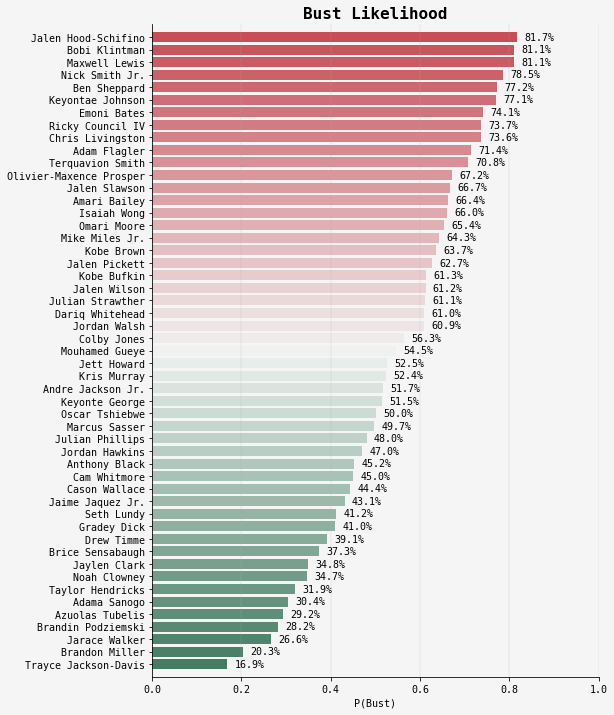

In [16]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib as mpl

import seaborn as sns

mpl.rcParams["font.family"]="monospace"
fig, ax = plt.subplots(figsize=(8, 12))
fig.set_facecolor("whitesmoke")
ax.set_facecolor("whitesmoke")

ax.grid(linewidth=.2, zorder=0)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

y_pos = np.arange(len(prospects_probas))
ord_pros = prospects_probas.sort_values("P(Bust)", ascending=True)

ax = sns.barplot(data=prospects_probas.sort_values("P(Bust)", ascending=True), 
                 x="P(Bust)", y="Player", palette=sns.diverging_palette(150, 10, n=len(prospects_probas)),
                 zorder=1)

for i, row in prospects_probas.sort_values("P(Bust)", ascending=True).reset_index().iterrows():
    prob = np.round(row["P(Bust)"]*100, 1)
    ax.annotate(f"{prob}%", xy=(row["P(Bust)"]+.05, i), ha="center", va="center")

ax.set_yticks(y_pos, labels=ord_pros.iloc[:,0])

ax.set_ylim(-1, len(prospects_probas))
ax.set_xlim(0, 1)

ax.set_ylabel(None)

plt.title("Bust Likelihood", fontsize=16, fontweight="bold");

In [17]:
plt.tight_layout()

<Figure size 432x288 with 0 Axes>

In [18]:
fig.savefig("bust_likelihood", bbox_inches="tight", dpi=300)